In [13]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.interpolate

# Схема Ейткена

In [14]:
def e_fun(x):
    return np.e**(7*x**2+1)
def w(xi_N, x0):
    s = 1
    for i in range(len(xi_N)):
        s *= x0-xi_N[i]
    #print("w", s)
    return s

In [15]:
def schemaAitken(xi, yi, x0):
    n = len(xi)
    t = (n, n)
    q = np.zeros(t)
    q[0] = yi
    for i in range(1, n):
        for j in range(i, n):
            q[i,j] = round(((x0 - xi[j]) * q[i-1,j-i] - (x0 - xi[j-i]) * q[i-1,j]) / (xi[j-i] - xi[j]), 3)
    return(q.T)

In [25]:
def get_index(arr):
    for i in range(len(arr)-2):
        if abs(arr[i]-arr[i+1]) <= abs(arr[i+1]-arr[i+2]):
            d = arr.index(arr[i])
            
    return d

In [26]:
xi = [round(i*0.1, 1) for i in range(6)]
yi = [round(e_fun(i),3) for i in xi]
print(xi, yi)
x0 = 0.245
SA = schemaAitken(xi, yi, x0)
print(SA)
a_v = []
for i in range(len(xi)):
    a_v.append(SA[i,i])
a_v

[0.1, 0.2, 0.3] [-4.094, -3.401, -2.996]
[[-4.094  0.     0.   ]
 [-3.401 -3.089  0.   ]
 [-2.996 -3.219 -2.334]]


[-4.094, -3.089, -2.334]

In [27]:
index = get_index(a_v)
index

2

In [28]:
answer = a_v[index]
answer

-2.334

# Інтерполяційний поліном Лагранжа

In [33]:
def interpolate_polinom_of_lagrange(xi, yi):
    return scipy.interpolate.lagrange(xi, yi)
def fun_value(arr_coef, x0):
    p = np.poly1d(PL)
    return p(x0)
def y_(arr_coef, x):
    p = np.poly1d(PL)
    y = p(x)
    return y

In [34]:
xiIL = [round(i*0.1, 3) for i in range(5)]
yiIL = [round(e_fun(i),3) for i in xiIL]
PL = [round(i, 3) for i in interpolate_polinom_of_lagrange(xiIL, yiIL)]
print(PL)
w_1 = np.polynomial.polynomial.Polynomial(PL)
x0 = 0.245
print("Polinom of Lagrange:", end = "")
for i in range(len(PL)-1):
      print(PL[i],"*x^",len(PL)-1-i, "+", end = "")
print(PL[len(PL)-1])
print("L(x0)=", fun_value(PL, x0))
error = abs(e_fun(x0) - fun_value(PL, x0))
print("похибка = ", round(error, 4))

[-14.4, 11.25, -5.075]
Polinom of Lagrange:-14.4 *x^ 2 +11.25 *x^ 1 +-5.075
L(x0)= -3.18311
похибка =  0.0151


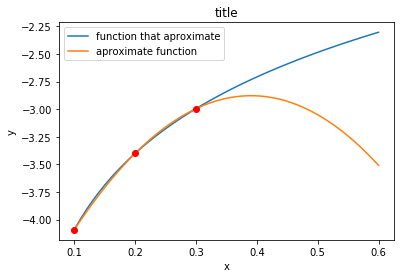

In [35]:
x = np.linspace(-0.6, 0.6)
y = e_fun(x)
m = len(PL)-1
#p = np.poly1d(PL)
fig, ax = plt.subplots()
ax.plot(x, y , label="function that aproximate")
ax.plot(x, y_(PL, x), label="aproximate function")
ax.plot(xiIL, y_(PL, xiIL), color="red", ls=' ', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')
ax.legend(loc=2); # upper left corner

# Інтерполяційний поліном Н'ютона

In [38]:
def PN(yi_N, h):
    n = len(yi_N)
    t = (n, n)
    q = np.zeros(t)
    q[0] = yi_N
    for i in range(1, n):
        for j in range(i, n):
            q[i,j] = round((q[i-1,j] - q[i-1,j-i]) / (h**i*math.factorial(i)), 3)
            
    return (q.T)

def get_pn(xi_N, pol_coef, x0):
    fun = pol_coef[0]
    for i in range(1, len(xi_N)):
        fun += pol_coef[i]*w(xi_N[:i], x0)
        #print("f", fun)
    return fun
def y_n(xi_N, pol_coef, x):
    return get_pn(xi_N, pol_coef, x)

In [39]:
h=0.25
xi_N = [round(i*h, 3) for i in range(5)]
yi_N = [round(e_fun(i),3) for i in xi_N]
x0 = 0.245
print(xi_N, yi_N)
PN_d = PN(yi_N, h)

print(PN_d)
pol_coef = [PN_d[i,i] for i in range(len(xi_N))]
print("a v of f in", x0, "is",round(get_pn(xi_N, pol_coef, x0),2))
error = round(abs(e_fun(x0) - get_pn(xi_N, pol_coef, x0)), 2)
print("похибка = ", round(error, 4))

[0.1, 0.2, 0.3] [-4.094, -3.401, -2.996]
[[ -4.094   0.      0.   ]
 [ -3.401   6.93    0.   ]
 [ -2.996   4.05  202.5  ]]
a v of f in 0.245 is -1.77
похибка =  1.43


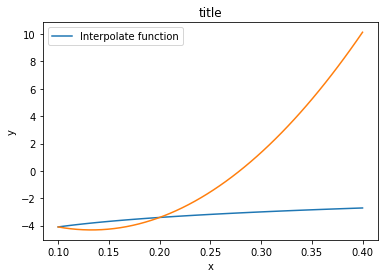

In [42]:
x = np.linspace(-1, 1)
y = e_fun(x)

fig, ax = plt.subplots()
ax.plot(x, y , label="Interpolate function")
ax.plot(x, y_n(xi_N, pol_coef, x))
#ax.plot(xi, e_fun(xi), color="red", ls=' ', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')
ax.legend(loc=2); # upper left corner